<a href="https://colab.research.google.com/github/limhasic/TimeSeries_Anomaly_Detection/blob/main/%EA%B0%95%EC%9D%98%EC%9E%90%EB%A3%8C_%EC%8B%9C%EA%B3%84%EC%97%B4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **목표 : 시계열 예측 모델과 이상 탐지에 대한 구현**

* 1. 시계열 예측  
    1.1 시계열 예측란?  
    1.2 시계열 예측 모델이란?   
    1.3 시계열 예측 모델 구성요소  
* 2. 데이터 불러오기  
    2.1 Kaggle 이란?    
    2.2 Kaggle 데이터 불러오기
* 3. 데이터 탐색   
    3.1 Kaggle 데이터 탐색  
* 4. 시계열 예측 모델 구축  
    4.1 시계열 예측 모델 구축
* 5. 이상 탐지(Anomaly Detection)  
    5.1 이상 탐지 모델 구축  
    5.2 결과 제출 

In [ ]:
# 코로나 확진자 수 예측 모델 구축  

In [1]:
!pip install kaggle # kaggle 라이브러리 설치
from google.colab import files # colab 라이브러리 가져오기 
files.upload()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"hasiclim","key":"9f64a79ffe5ffd4a8c6e5624af84e49f"}'}

In [2]:
# Kaggle 폴더 생성
# kaggle.json 파일 이동

!mkdir -p ~/.kaggle 
!cp kaggle.json ~/.kaggle/
# 나에 대한 읽기(4) 쓰기(1) 권한부여 설정
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
# Json 파일 확인
!ls -1ha kaggle.json

kaggle.json


In [5]:
# 파일 다운로드 
!kaggle competitions download -c covid19-global-forecasting-week-1

  0% 0.00/200k [00:00<?, ?B/s]
100% 200k/200k [00:00<00:00, 100MB/s]


In [6]:
# 전체 파일 압축해제
!unzip -q /content/covid19-global-forecasting-week-1.zip

In [ ]:
# 데이터 다운로드 완료


In [10]:
# 먼저, 데이터에 대해 살펴 본다면, 

import pandas as pd 
train_data  = pd.read_csv("/content/train.csv")


In [12]:
train_data.info()

# Id : Id 
# Province/State : 주/도
# Country/Region : 나라/지역
# Lat : 위도(남-적도-북)
# Long : 경도(서-본초자오선-동) : 그리니치 천문대
# Date : 날짜
# ConfirmedCases : 확진된 케이스 : 확진자 
# Fatalities : 사망자

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17892 entries, 0 to 17891
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              17892 non-null  int64  
 1   Province/State  8190 non-null   object 
 2   Country/Region  17892 non-null  object 
 3   Lat             17892 non-null  float64
 4   Long            17892 non-null  float64
 5   Date            17892 non-null  object 
 6   ConfirmedCases  17892 non-null  float64
 7   Fatalities      17892 non-null  float64
dtypes: float64(4), int64(1), object(3)
memory usage: 1.1+ MB


In [13]:
train_data['Date'] # : 2020년 1월 22일 부터 2020년 3월 24일까지

0        2020-01-22
1        2020-01-23
2        2020-01-24
3        2020-01-25
4        2020-01-26
            ...    
17887    2020-03-20
17888    2020-03-21
17889    2020-03-22
17890    2020-03-23
17891    2020-03-24
Name: Date, Length: 17892, dtype: object

In [21]:
# 시각화 패키지를 이용

import plotly as py
import plotly.express as px

In [25]:
group = train_data.groupby(['Date', 'Country/Region'])['ConfirmedCases'].sum()
group = group.reset_index()
group.head()

,Date,Country/Region,ConfirmedCases
0,2020-01-22,Afghanistan,0.0
1,2020-01-22,Albania,0.0
2,2020-01-22,Algeria,0.0
3,2020-01-22,Andorra,0.0
4,2020-01-22,Antigua and Barbuda,0.0


In [28]:
choro_map=px.choropleth(group, 
                    locations="Country/Region", 
                    locationmode = "country names",
                    color="ConfirmedCases", 
                    animation_frame="Date"
                   )

choro_map.update_layout(
    title_text = 'Global Spread of Coronavirus',
    title_x = 0.5,
    geo=dict(
        showframe = False,
        showcoastlines = False,
    ))
    
choro_map.show()

In [19]:
train_data['Country/Region'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Benin', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Brazil', 'Brunei', 'Bulgaria',
       'Burkina Faso', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chile', 'China', 'Colombia',
       'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cruise Ship', 'Cuba', 'Cyprus',
       'Czechia', 'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador',
       'Egypt', 'Equatorial Guinea', 'Estonia', 'Eswatini', 'Ethiopia',
       'Finland', 'France', 'French Guiana', 'Gabon', 'Gambia, The',
       'Georgia', 'Germany', 'Ghana', 'Greece', 'Greenland', 'Guadeloupe',
       'Guam', 'Guatemala', 'Guernsey', 'Guinea', 'Guyana', 'Holy See',
       'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia

In [30]:
# Korea, South 에 대한 데이터 추출
korea = train_data[train_data['Country/Region'] == "Korea, South"]
korea

,Id,Province/State,Country/Region,Lat,Long,Date,ConfirmedCases,Fatalities
8820,13021,NaN,"Korea, South",36.0,128.0,2020-01-22,1.0,0.0
8821,13022,NaN,"Korea, South",36.0,128.0,2020-01-23,1.0,0.0
8822,13023,NaN,"Korea, South",36.0,128.0,2020-01-24,2.0,0.0
8823,13024,NaN,"Korea, South",36.0,128.0,2020-01-25,2.0,0.0
8824,13025,NaN,"Korea, South",36.0,128.0,2020-01-26,3.0,0.0
...,...,...,...,...,...,...,...,...
8878,13079,NaN,"Korea, South",36.0,128.0,2020-03-20,8652.0,94.0
8879,13080,NaN,"Korea, South",36.0,128.0,2020-03-21,8799.0,102.0
8880,13081,NaN,"Korea, South",36.0,128.0,2020-03-22,8897.0,104.0
8881,13082,NaN,"Korea, South",36.0,128.0,2020-03-23,8961.0,111.0


ConversionError: ignored

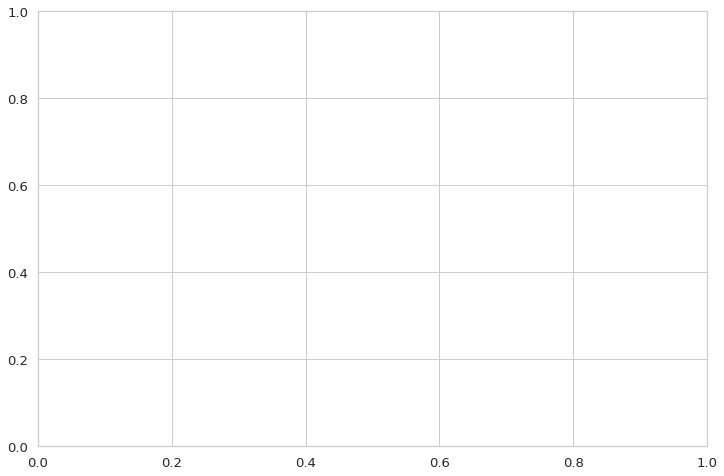

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8
sns.set(style='whitegrid', palette='muted', font_scale=1.2)

plt.plot(korea)
plt.show()

# 평가 지표

예측 된 값과 실제 값 사이의 차이 값을 통해 모델의 성능을 가늠

yi: 예측 대상인 실제 값  
y^i: 모델에 의한 예측 값  
n: 시험 데이터셋(test dataset)의 크기  


# 코로나 데이터 확진자 수 (2019)

In [ ]:
import pandas as pd

all = pd.read_csv('/content/covid_19_data.csv')
confirmed = pd.read_csv('/content/time_series_covid_19_confirmed.csv') # 누적데이터로 해당 날짜까지의 총 확진자수를 의미

In [ ]:
confirmed

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,64575,65080,65486,65728,66275,66903,67743,68366,69130,70111
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,132118,132153,132176,132209,132215,132229,132244,132264,132285,132297
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,126156,126434,126651,126860,127107,127361,127646,127926,128198,128456
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,13569,13569,13569,13569,13569,13664,13671,13682,13693,13693
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,31661,31909,32149,32441,32623,32933,33338,33607,33944,34180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,NaN,Vietnam,14.058324,108.277199,0,2,2,2,2,2,...,4809,4941,5119,5275,5404,5931,6086,6356,6396,6908
272,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,304532,304968,305201,305201,305777,306334,306795,306795,307569,307838
273,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,6613,6632,6649,6658,6662,6670,6688,6696,6723,6731
274,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,92754,92920,93106,93201,93279,93428,93627,93947,94430,94751
